# PGA Tour Machine Learning Project 

## Can We Predict If a PGA Tour Player Won a Tournament in That Year and Their Earnings?

Having grown up watching golf, I have always been interested in exploring what sets the best golfers (golfers with wins) apart from the rest. Therefore, I decided to explore their statistics. To collect all the data, I scraped the data from the [PGA Tour website](https://www.pgatour.com/stats.html) using python libraries such as beautifulsoup. (The code for the data collection is included in the repository)

From this data, I performed an exploratory data analysis to explore the distribution of players on numerous aspects of the game, discover outliers, and further explore how the game has changed from 2010 to 2018. I also utilized numerous supervised machine learning models to predict a golfer's earnings and wins. 

To predict the golfer's win, I used multiple classification methods such as logisitic regression, SVM (Support Vector Machines), and Random Forest Classification. I found that I had the best performance with the Random Forest Classification method. To predict the golfer's earnings, I used linear regression, polynomial features with linear regression, and ridge regression. 

## <a id='TOC'>Table of Contents</a>
<ol>
<li><a href='#section 1'>Description of the Data</a></li>
<li><a href='#section_2'>Data Cleaning</a></li>
<li><a href='#section_3'>Exploratory Data Analysis</a></li>
<li><a href='#section_4'>Machine Learning Model (Classification)</a></li>
<li><a href='#section_5'>Machine Learning Model (Regression)</a></li>
<li><a href='#section_6'>Conclusion</a></li>
</ol>

## 1. <a id='section_1'>Description of the Data</a>
<a href='#TOC'>Back to table of Contents</a>
  
pgaTourData.csv contains 1674 rows and 18 columns. Each row indicates a golfer's performance for that year.

- Player Name: Name of the golfer
- Rounds: The number of games that a player played  
- Fairway Percentage: The percentage of time a tee shot lands on the fairway
- Year: The year in which the statistic was collected 
- Avg Distance: The average distance of the tee-shot 
- gir: (Green in Regulation) is met if any part of the ball is touching the putting surface while the number of strokes taken is at least two fewer than par
- Average Putts: The average number of strokes taken on the green 
- Average Scrambling: Scrambling is when a player misses the green in regulation, but still makes par or better on a hole
- Average Score: Average Score is the average of all the scores a player has played in that year 
- Points: The number of FedExCup points a player earned in that year. These points can be earned by competing in tournaments.
- Wins: The number of competition a player has won in that year 
- Top 10: The number of competitions where a player has placed in the Top 10
- Average SG Putts: Strokes gained: putting measures how many strokes a player gains (or loses) on the greens.
- Average SG Total: The Off-the-tee + approach-the-green + around-the-green + putting statistics combined
- SG:OTT: Strokes gained: off-the-tee measures  player performance off the tee on all par-4s and par-5s. 
- SG:APR: Strokes gained: approach-the-green measures player performance on approach shots. Approach shots include all shots that are not from the tee on par-4 and par-5 holes and are not included in strokes gained: around-the-green and strokes gained: putting. Approach shots include tee shots on par-3s.
- SG:ARG: Strokes gained: around-the-green measures player performance on any shot within 30 yards of the edge of the green. This statistic does not include any shots taken on the putting green.
- Money: The amount of prize money a player has earned from tournaments

The official explanation for strokes gained is included [here](https://www.pgatour.com/news/2016/05/31/strokes-gained-defined.html).

### Importing Packages 

In [312]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and Examining the Data

In [313]:
# Importing the data 
df = pd.read_csv('/Users/jpar746/Desktop/Work/PGA Tour/pgaTourData.csv')

# Examining the first 5 data
print(df.head())

      Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
0  Henrik Stenson    60.0               75.19  2018         291.5  73.51   
1     Ryan Armour   109.0               73.58  2018         283.5  68.22   
2     Chez Reavie    93.0               72.24  2018         286.5  68.67   
3      Ryan Moore    78.0               71.94  2018         289.2  68.80   
4    Brian Stuard   103.0               71.44  2018         278.9  67.12   

   Average Putts  Average Scrambling  Average Score Points  Wins  Top 10  \
0          29.93               60.67         69.617    868   NaN     5.0   
1          29.31               60.13         70.758  1,006   1.0     3.0   
2          29.12               62.27         70.432  1,020   NaN     3.0   
3          29.17               64.16         70.015    795   NaN     5.0   
4          29.11               59.23         71.038    421   NaN     3.0   

   Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG       Money  
0         

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
Player Name           2312 non-null object
Rounds                1678 non-null float64
Fairway Percentage    1678 non-null float64
Year                  2312 non-null int64
Avg Distance          1678 non-null float64
gir                   1678 non-null float64
Average Putts         1678 non-null float64
Average Scrambling    1678 non-null float64
Average Score         1678 non-null float64
Points                2296 non-null object
Wins                  293 non-null float64
Top 10                1458 non-null float64
Average SG Putts      1678 non-null float64
Average SG Total      1678 non-null float64
SG:OTT                1678 non-null float64
SG:APR                1678 non-null float64
SG:ARG                1678 non-null float64
Money                 2300 non-null object
dtypes: float64(14), int64(1), object(3)
memory usage: 325.2+ KB


In [315]:
df.shape

(2312, 18)

We can see that the data has 1674 rows and 18 columns.

## 2. <a id='section_2'>Data Cleaning</a>
<a href='#TOC'>Back to table of Contents</a>

From a rough look at the initial data, I realized that the data needs to be further cleaned. 
- For the columns Top 10 and Wins, convert the NaNs to 0s. 
- Change Top 10 and Wins into an int
- Drop NaN values for players who do not have the full statistics
- Change the columns Rounds into int 
- Change points to int 
- Remove the dollar sign ($) and commas in the column Money

In [316]:
# Replace NaN with 0 in Top 10 
df['Top 10'].fillna(0, inplace=True)
df['Top 10'] = df['Top 10'].astype(int)

# Replace NaN with 0 in # of wins
df['Wins'].fillna(0, inplace=True)
df['Wins'] = df['Wins'].astype(int)

# Drop NaN values 
df.dropna(axis = 0, inplace=True)

In [317]:
# Change Rounds to int
df['Rounds'] = df['Rounds'].astype(int)

# Change Points to int 
df['Points'] = df['Points'].apply(lambda x: x.replace(',',''))
df['Points'] = df['Points'].astype(int)

# Remove the $ and commas in money 
df['Money'] = df['Money'].apply(lambda x: x.replace('$',''))
df['Money'] = df['Money'].apply(lambda x: x.replace(',',''))
df['Money'] = df['Money'].astype(float)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1677
Data columns (total 18 columns):
Player Name           1674 non-null object
Rounds                1674 non-null int64
Fairway Percentage    1674 non-null float64
Year                  1674 non-null int64
Avg Distance          1674 non-null float64
gir                   1674 non-null float64
Average Putts         1674 non-null float64
Average Scrambling    1674 non-null float64
Average Score         1674 non-null float64
Points                1674 non-null int64
Wins                  1674 non-null int64
Top 10                1674 non-null int64
Average SG Putts      1674 non-null float64
Average SG Total      1674 non-null float64
SG:OTT                1674 non-null float64
SG:APR                1674 non-null float64
SG:ARG                1674 non-null float64
Money                 1674 non-null float64
dtypes: float64(12), int64(5), object(1)
memory usage: 248.5+ KB


In [319]:
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0


In [320]:
df.describe()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1.674000e+03
mean,78.769415,61.448614,2014.002987,290.786081,65.667103,29.163542,58.120687,70.922877,631.125448,0.206691,2.337515,0.025408,0.147527,0.037019,0.065192,0.020192,1.488682e+06
std,14.241512,5.057758,2.609352,8.908379,2.743211,0.518966,3.386783,0.698738,452.741472,0.516601,2.060691,0.344145,0.695400,0.379702,0.380895,0.223493,1.410333e+06
min,45.000000,43.020000,2010.000000,266.400000,53.540000,27.510000,44.010000,68.698000,3.000000,0.000000,0.000000,-1.475000,-3.209000,-1.717000,-1.680000,-0.930000,2.465000e+04
25%,69.000000,57.955000,2012.000000,284.900000,63.832500,28.802500,55.902500,70.494250,322.000000,0.000000,1.000000,-0.187750,-0.260250,-0.190250,-0.180000,-0.123000,5.656412e+05
50%,80.000000,61.435000,2014.000000,290.500000,65.790000,29.140000,58.290000,70.904500,530.000000,0.000000,2.000000,0.040000,0.147000,0.055000,0.081000,0.022500,1.046144e+06
75%,89.000000,64.910000,2016.000000,296.375000,67.587500,29.520000,60.420000,71.343750,813.750000,0.000000,3.000000,0.258500,0.568500,0.287750,0.314500,0.175750,1.892478e+06
max,120.000000,76.880000,2018.000000,319.700000,73.520000,31.000000,69.330000,74.400000,4169.000000,5.000000,14.000000,1.130000,2.406000,1.485000,1.533000,0.660000,1.203046e+07


## 3. <a id='section_3'>Exploratory Data Analysis</a>
<a href='#TOC'>Back to table of Contents</a>

### Distribution of the Data 

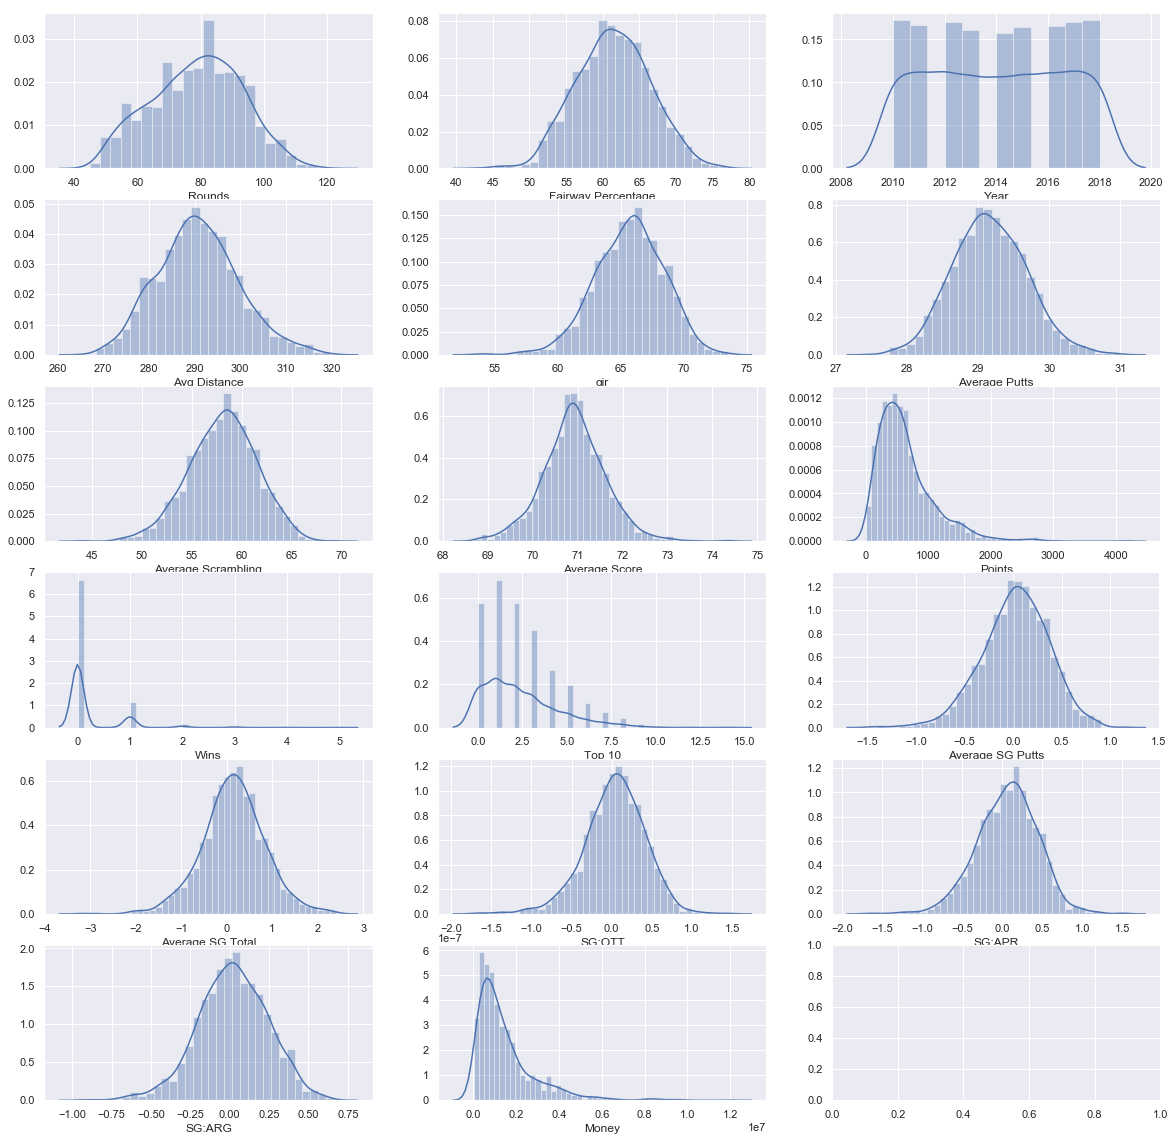

In [321]:
# Looking at the distribution of data
f, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(20,20))
distribution = df.loc[:,df.columns!='Player Name'].columns
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.distplot(df[column], ax=ax[rows][cols])
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1


From the distributions plotted, It appears that most of the graphs are normally distributed. However, we can observe that Money, Points, Wins, and Top 10s tend to are all skewed to the right. This could be explained by the separation of the best players and the average PGA Tour player. The best players have multiple placings in the Top 10 with wins that allows them to earn more from tournaments, while the average player will have no wins and only a few Top 10 placings that prevent them from earning as much. 

### Exploring Wins and Top 10 Placings by Year

In [322]:
# Looking at the number of players with Wins for each year 
win = df.groupby('Year')['Wins'].value_counts()
win = win.unstack()
win.fillna(0, inplace=True)

# Converting win into ints
win = win.astype(int)

print(win)

Wins    0   1  2  3  4  5
Year                     
2010  166  21  5  0  0  0
2011  156  25  5  0  0  0
2012  159  26  4  1  0  0
2013  152  24  3  0  0  1
2014  142  29  3  2  0  0
2015  150  29  2  1  1  0
2016  152  28  4  1  0  0
2017  156  30  0  3  1  0
2018  158  26  5  3  0  0


From this table, we can see that most players end the year without a win. In fact it is pretty rare to find a player that has won more than once. 

In [323]:
# Looking at the percentage of players without a win in that year 
players = win.apply(lambda x: np.sum(x), axis=1)
percent_no_win = win[0]/players
percent_no_win = percent_no_win*100
print(percent_no_win)

Year
2010    86.458333
2011    83.870968
2012    83.684211
2013    84.444444
2014    80.681818
2015    81.967213
2016    82.162162
2017    82.105263
2018    82.291667
dtype: float64


Text(0.5, 1.0, 'Percentage of Players without a Win')

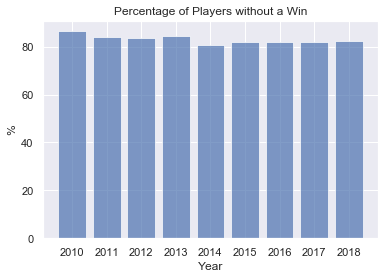

In [324]:
# Plotting percentage of players without a win each year 
fig, ax = plt.subplots()
bar_width = 0.8
opacity = 0.7 
index = np.arange(2010, 2019)

plt.bar(index, percent_no_win, bar_width, alpha = opacity)
plt.xticks(index)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Percentage of Players without a Win')

From the box plot above, we can observe that the percentages of players without a win are around 80%. There wa also a negligible amount of variation in the percentage of players without a win in the past 8 years. 

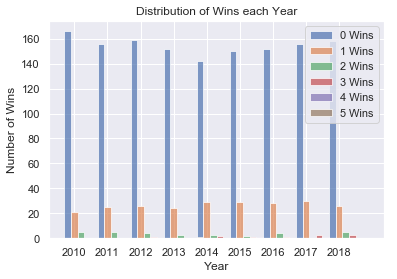

In [325]:
# Plotting the number of wins on a bar chart 
fig, ax = plt.subplots()
index = np.arange(2010, 2019)
bar_width = 0.2
opacity = 0.7 

def plot_bar(index, win, labels):
    plt.bar(index, win, bar_width, alpha=opacity, label=labels)

# Plotting the bars
rects = plot_bar(index, win[0], labels = '0 Wins')
rects1 = plot_bar(index + bar_width, win[1], labels = '1 Wins')
rects2 = plot_bar(index + bar_width*2, win[2], labels = '2 Wins')
rects3 = plot_bar(index + bar_width*3, win[3], labels = '3 Wins')
rects4 = plot_bar(index + bar_width*4, win[4], labels = '4 Wins')
rects5 = plot_bar(index + bar_width*5, win[5], labels = '5 Wins')

plt.xticks(index + bar_width, index)
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Distribution of Wins each Year')
plt.legend()

By looking at the distribution of Wins each year, we can see that it is rare for most players to even win a tournament in the PGA Tour. Majority of players do not win, and a very few number of players win more than once a year.

In [326]:
# Percentage of people who did not place in the top 10 each year
top10 = df.groupby('Year')['Top 10'].value_counts()
top10 = top10.unstack()
top10.fillna(0, inplace=True)
players = top10.apply(lambda x: np.sum(x), axis=1)

no_top10 = top10[0]/players * 100
print(no_top10)

Year
2010    17.187500
2011    25.268817
2012    23.157895
2013    18.888889
2014    16.477273
2015    18.579235
2016    20.000000
2017    15.789474
2018    17.187500
dtype: float64


By looking at the percentage of players that did not place in the top 10 by year, We can observe that only approximately 20% of players did not place in the Top 10. In addition, the range for these player that did not place in the Top 10 is only 9.47%. This tells us that this statistic does not vary much on a yearly basis. 

### Exploring the Longest Hitters

In [327]:
# Who are some of the longest hitters 
distance = df[['Year','Player Name','Avg Distance']].copy()
distance.sort_values(by='Avg Distance', inplace=True, ascending=False)
print(distance.head())

      Year     Player Name  Avg Distance
162   2018    Rory McIlroy         319.7
1481  2011     J.B. Holmes         318.4
174   2018   Trey Mullinax         318.3
732   2015  Dustin Johnson         317.7
350   2017    Rory McIlroy         316.7


We can see that Rory McIlroy is one of the longest hitters in the game, setting the average driver distance to be 319.7 yards in 2018. He was also the longest hitter in 2017 with an average of 316.7 yards. There are other notable players like J.B. Holmes and Dustin Johnson who have an average of over 317 yards.

### Exploring the Earnings of Players

In [328]:
# Who made the most money
money_ranking = df[['Year','Player Name','Money']].copy()
money_ranking.sort_values(by='Money', inplace=True, ascending=False)
print(money_ranking.head())

     Year     Player Name       Money
647  2015   Jordan Spieth  12030465.0
361  2017   Justin Thomas   9921560.0
303  2017   Jordan Spieth   9433033.0
729  2015       Jason Day   9403330.0
520  2016  Dustin Johnson   9365185.0


We can see that Jordan Spieth has made the most amount of money in a year. Earning an outstanding total of 12 million dollars

In [329]:
# Who made the most money each year
money_rank = money_ranking.groupby('Year')['Money'].max()
money_rank = pd.DataFrame(money_rank)
print(money_rank.iloc[0,0])

indexs = np.arange(2010, 2019)
names = []
for i in range(money_rank.shape[0]):
    temp = df.loc[df['Money'] == money_rank.iloc[i,0],'Player Name']
    names.append(str(temp.values[0]))

money_rank['Player Name'] = names
print(money_rank)

4910477.0
           Money     Player Name
Year                            
2010   4910477.0     Matt Kuchar
2011   6683214.0     Luke Donald
2012   8047952.0    Rory McIlroy
2013   8553439.0     Tiger Woods
2014   8280096.0    Rory McIlroy
2015  12030465.0   Jordan Spieth
2016   9365185.0  Dustin Johnson
2017   9921560.0   Justin Thomas
2018   8694821.0   Justin Thomas


With this table, we can examine the earnings of each player by year. Some of the most notable were Jordan Speith's earning of 12 million dollars and Justin Thomas earning the most money in both 2017 and 2018. 

### Golf Statistics over Time

Index(['Rounds', 'Fairway Percentage', 'Avg Distance', 'gir', 'Average Putts',
       'Average Scrambling', 'Average Score', 'Points', 'Top 10',
       'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR', 'SG:ARG',
       'Money'],
      dtype='object')


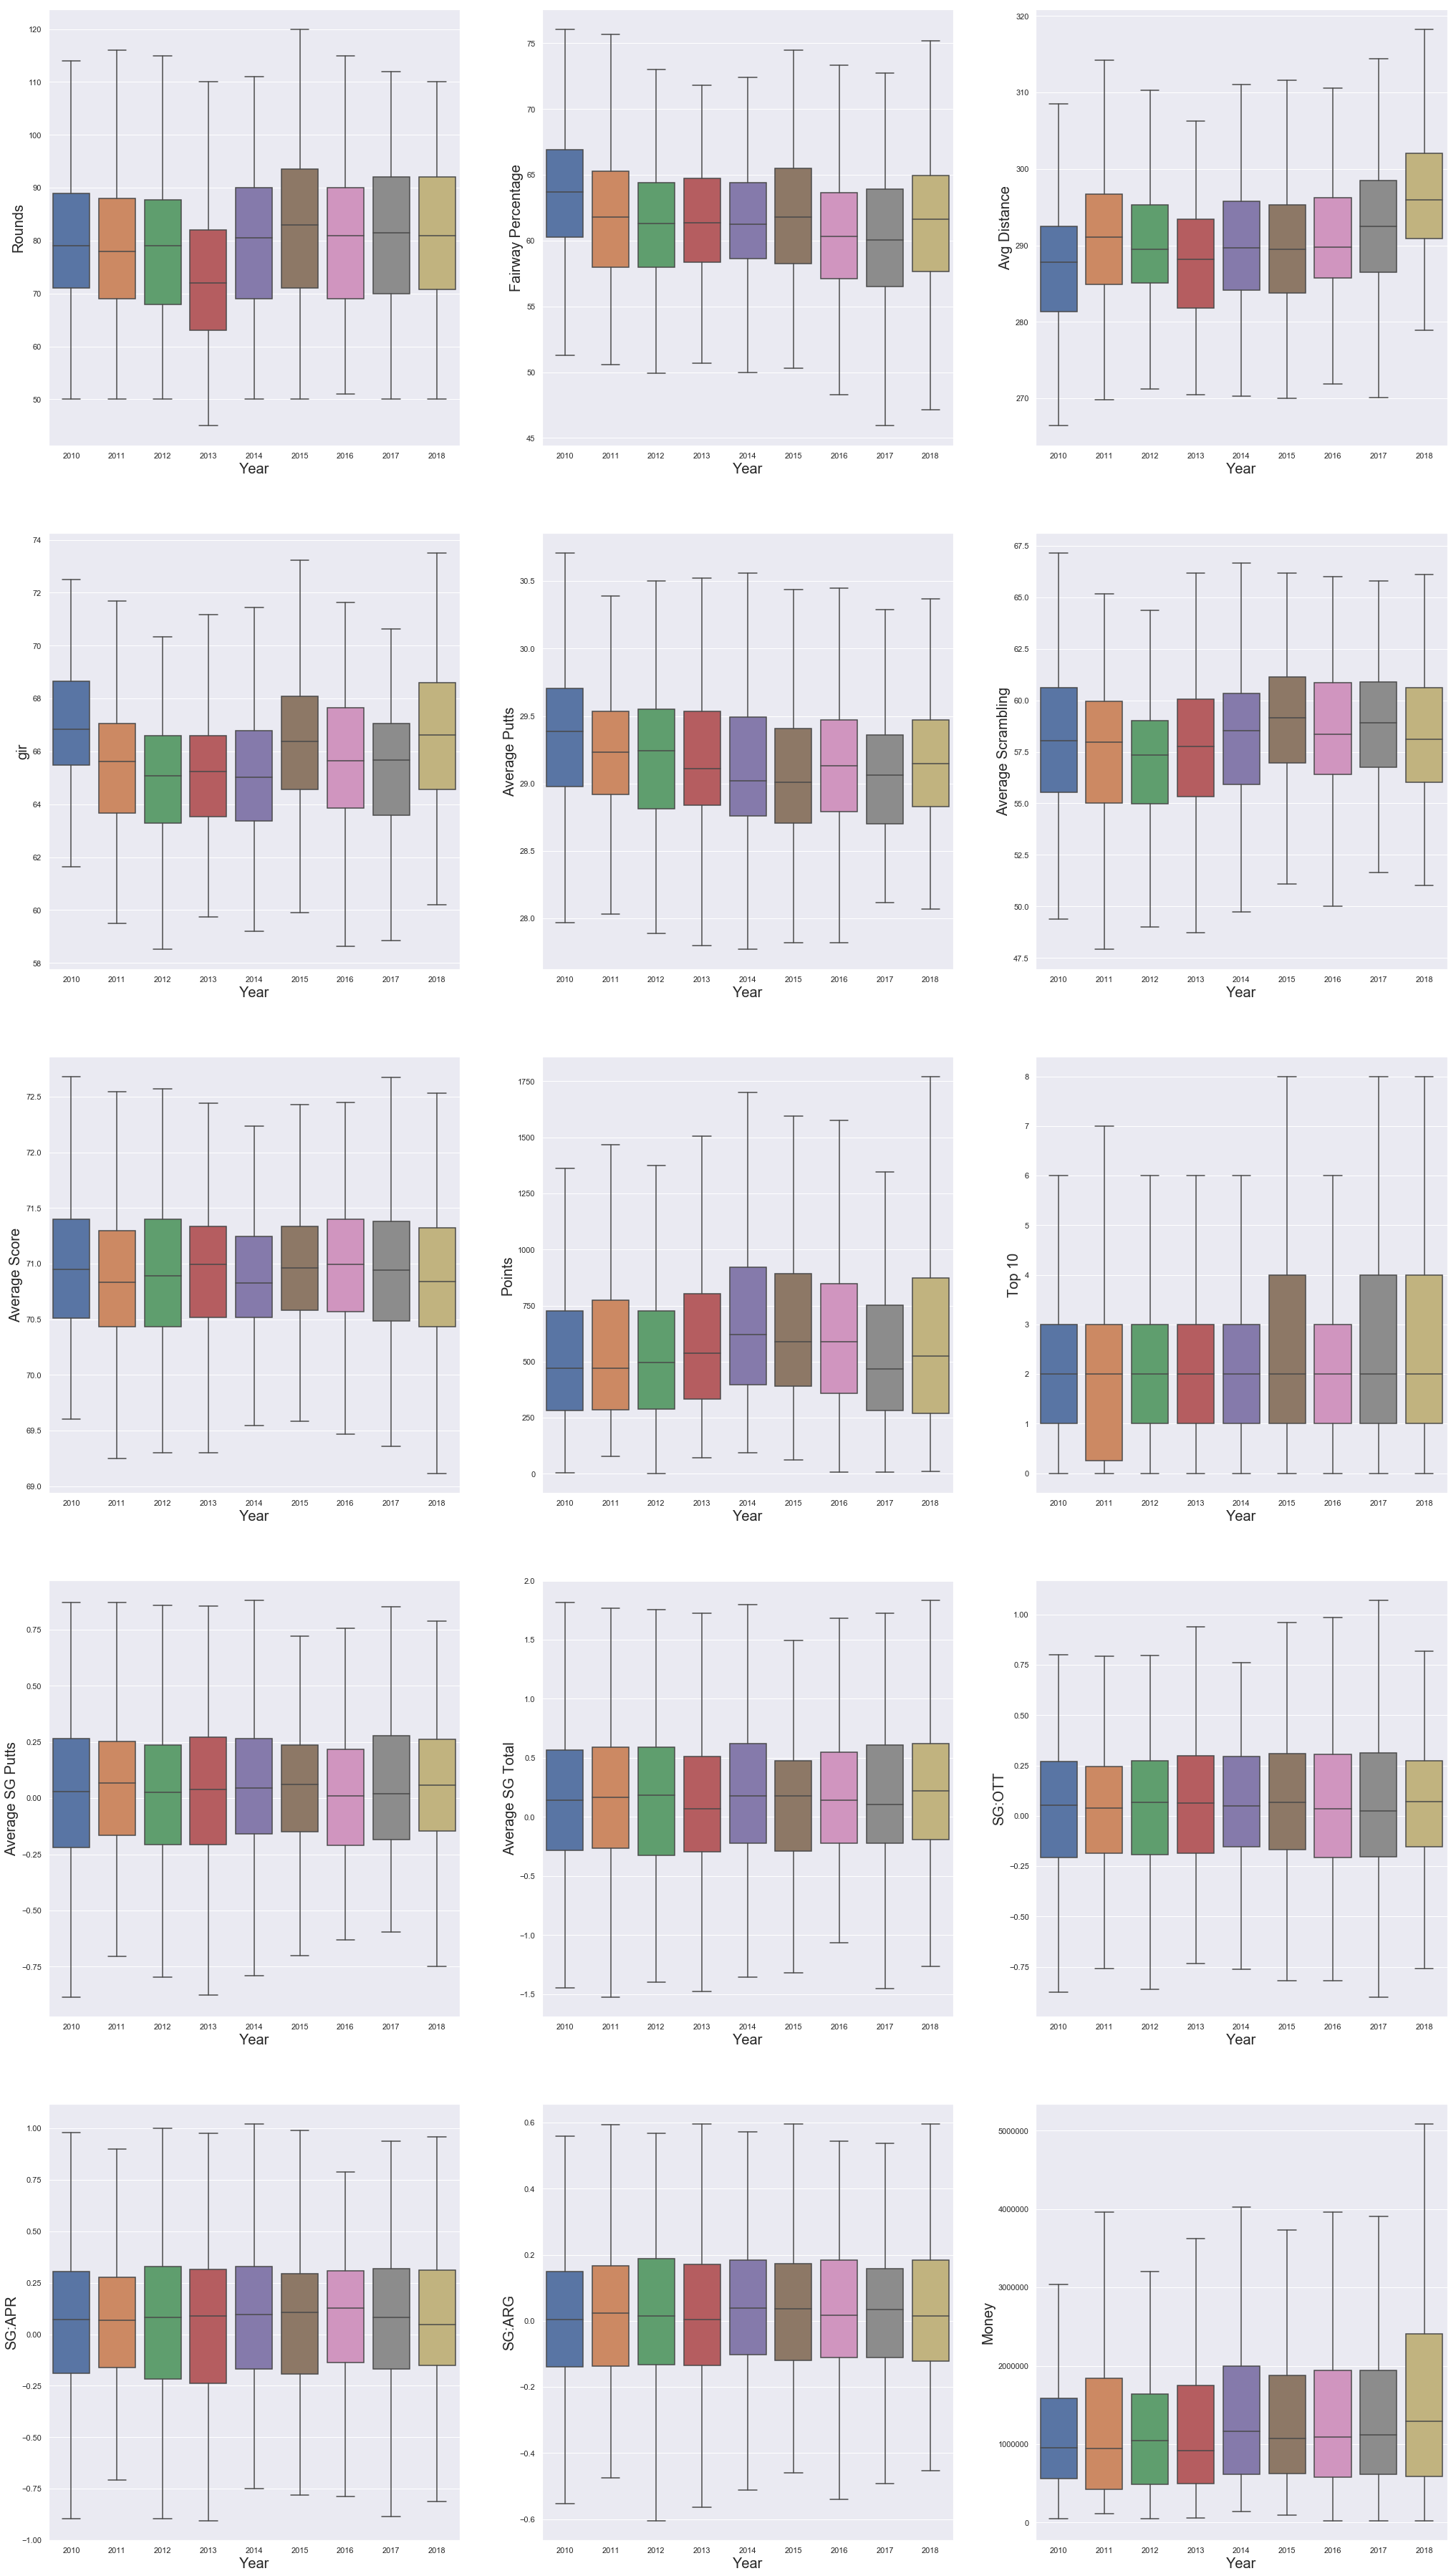

In [345]:
# Looking at the changes in statistics over time 
f, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(35,65))
distribution = df.loc[:,(df.columns!='Player Name') & (df.columns!='Wins')].columns
distribution = distribution[distribution != 'Year']

print(distribution)
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.boxplot(x = 'Year', y = column, data=df, ax=ax[rows][cols], showfliers=False)
    p.set_ylabel(column,fontsize=20)
    p.set_xlabel('Year',fontsize=20)
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1


Something that I found interesting by plotting each variable across time was majority of the statistics had little to no change for Professional Golfers in the past 8 years. However, some of the areas where there were changes were in Money, Average Score, and Rounds. 

This was rather interesting as golf club manufacturers would often advertise about the huge improvements in distance for players when they switched to their latest club. But in fact, there was only an increase in the average distance of 10 yards. 

### Comparing the Average and Champions

In [23]:
# Defining the players that had a win or more in each year 
champion = df.loc[df['Wins'] >= 1, :]
print(champion.head())

        Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
1       Ryan Armour     109               73.58  2018         283.5  68.22   
16   Billy Horschel      86               67.80  2018         295.4  71.75   
22  Ted Potter, Jr.      87               66.83  2018         286.0  63.03   
23      Austin Cook     107               66.76  2018         292.3  66.51   
27      Ian Poulter      73               66.41  2018         293.6  67.01   

    Average Putts  Average Scrambling  Average Score  Points  Wins  Top 10  \
1           29.31               60.13         70.758    1006     1       3   
16          29.46               58.03         70.154     960     1       3   
22          28.45               57.51         71.024     744     1       1   
23          28.72               62.02         70.469    1060     1       3   
27          28.97               57.11         70.593    1030     1       4   

    Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG

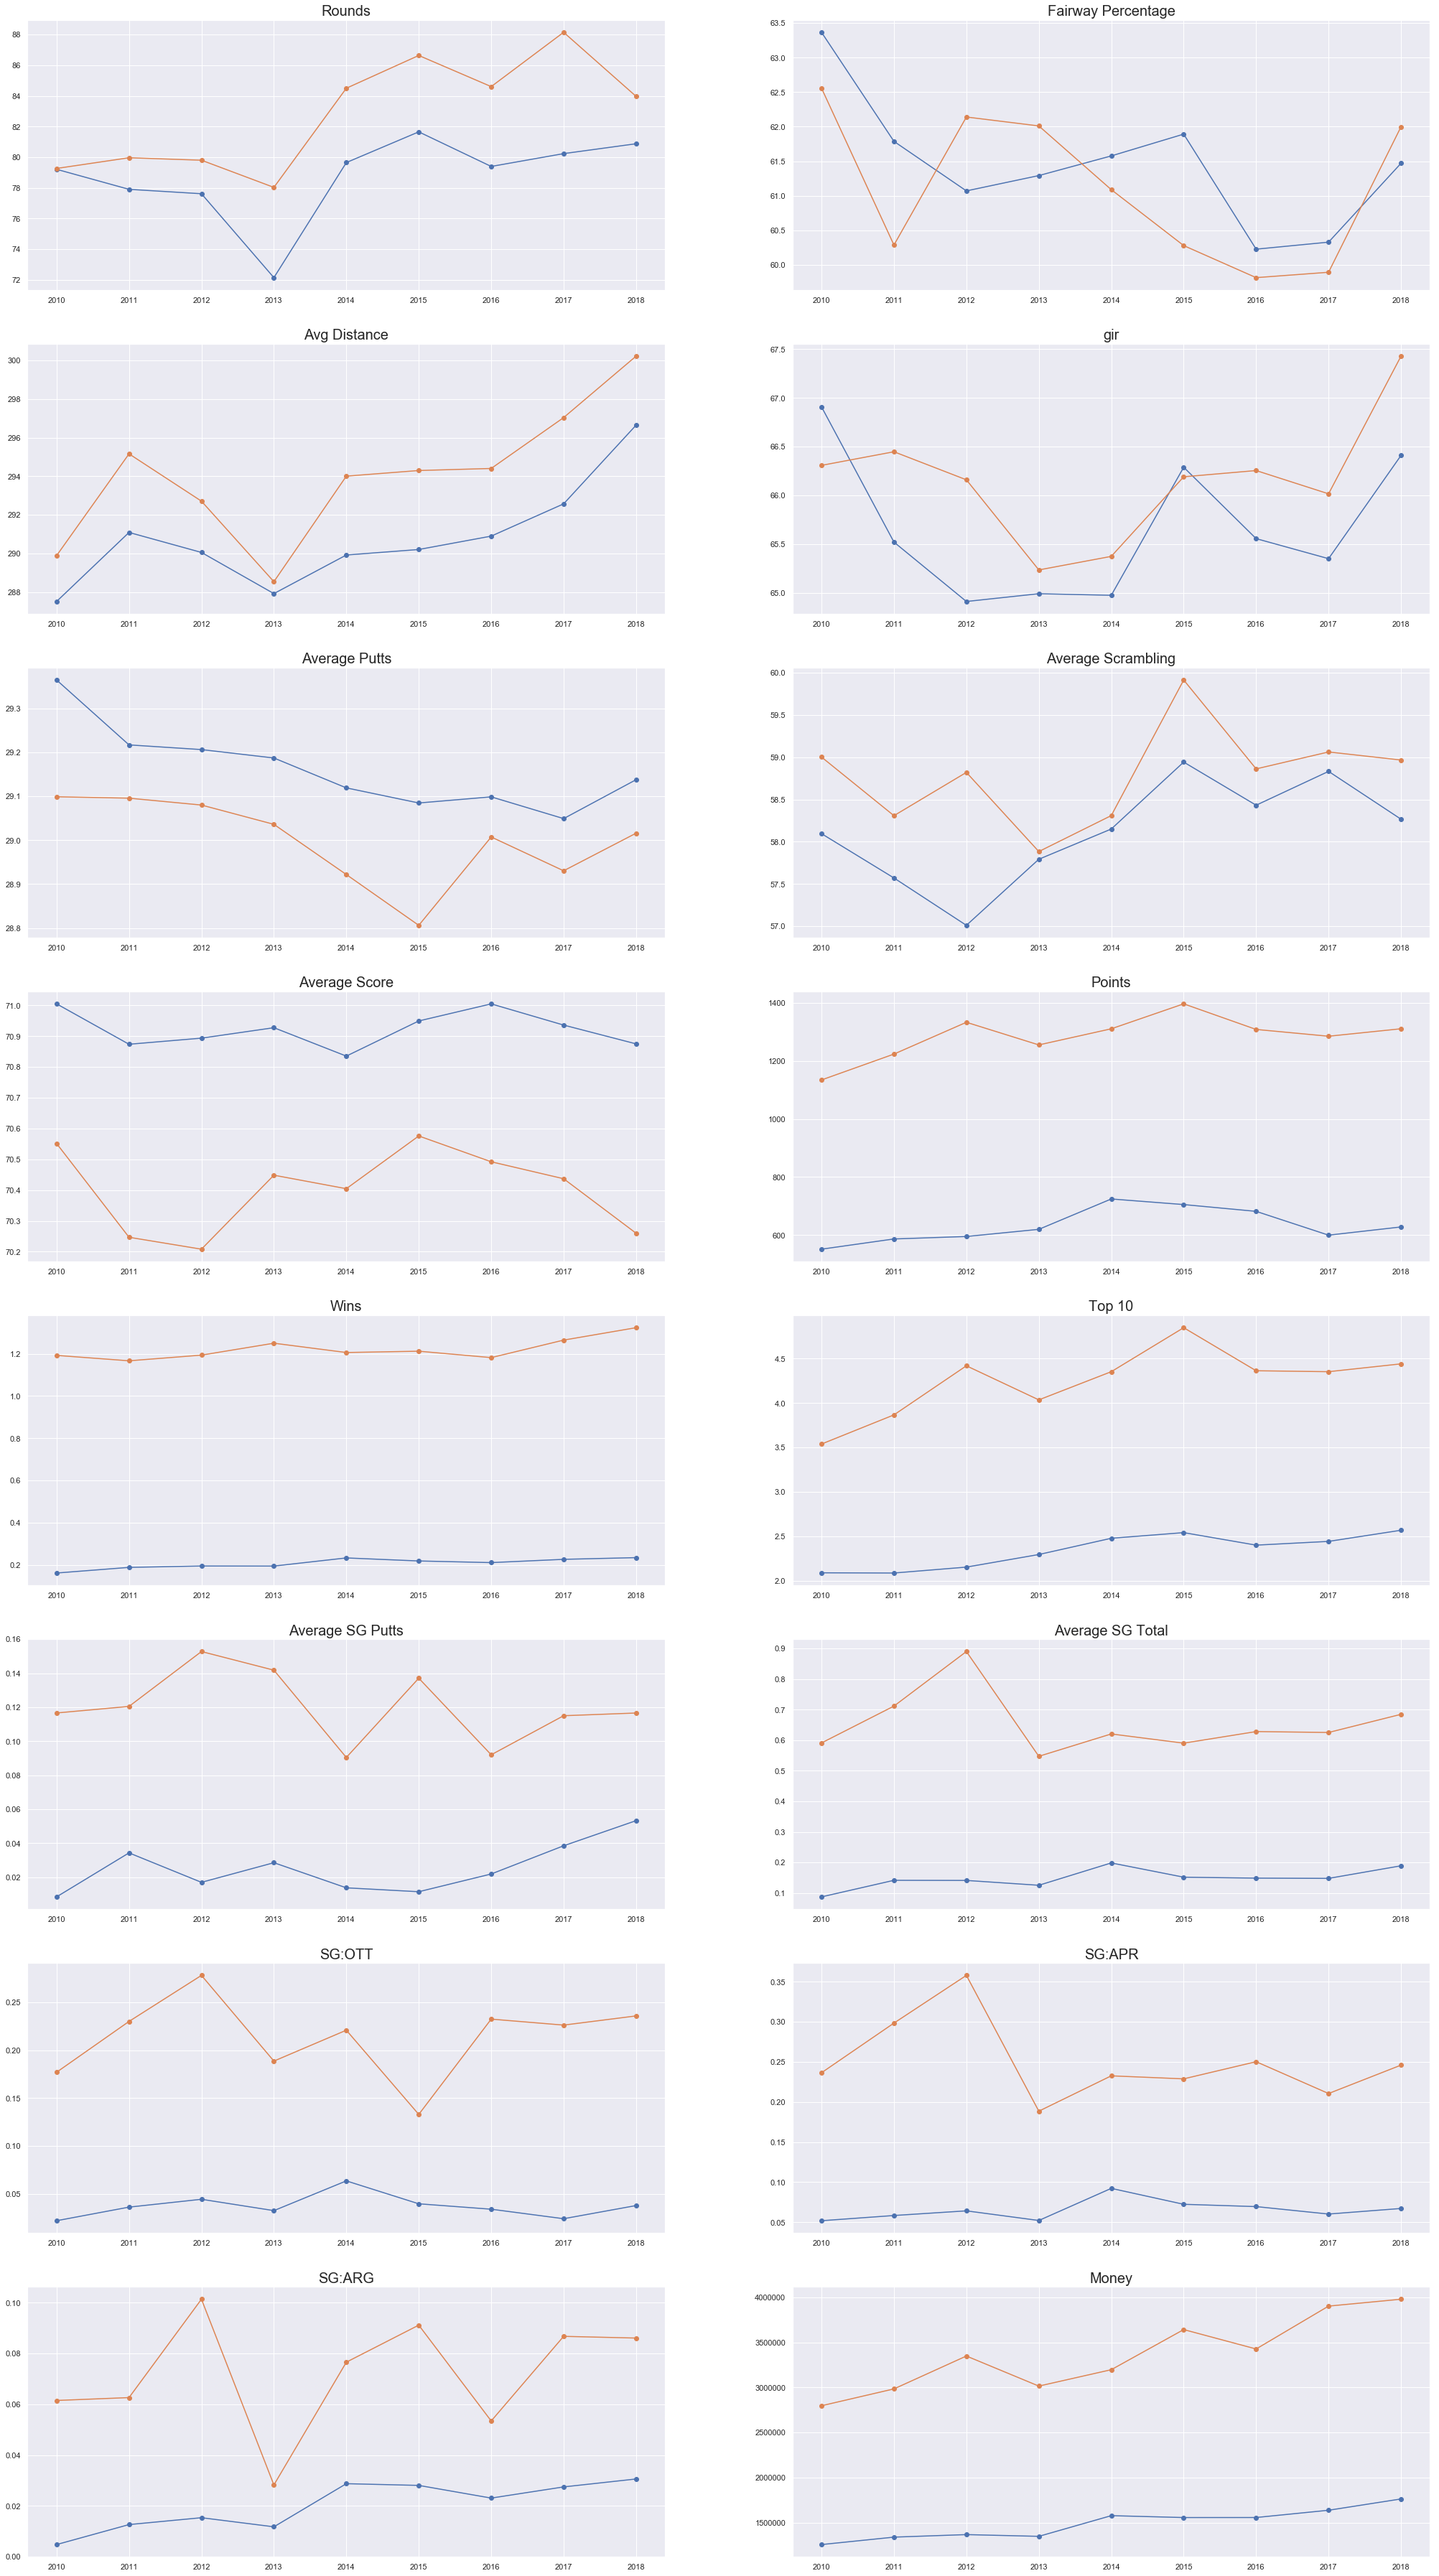

In [346]:
f, ax = plt.subplots(nrows = 8, ncols = 2, figsize=(35,65))
distribution = df.loc[:,df.columns!='Player Name'].columns
distribution = distribution[distribution != 'Year']

rows = 0
cols = 0
lower_better = ['Average Putts', 'Average Score']
for i, column in enumerate(distribution):
    avg = df.groupby('Year')[column].mean()
    best = champion.groupby('Year')[column].mean()
    ax[rows,cols].plot(avg, 'o-',)
    ax[rows,cols].plot(best, 'o-',)
    ax[rows,cols].set_title(column, fontsize = 20)
    
    cols += 1
    if cols == 2:
        cols = 0
        rows += 1

From the Graphs above, we can see the average scores of the best players (players with a win) versus the PGA Tour average. This can give us an indication to which statistics help players win. 

We can see that the fairway percentage and greens in regulations does not seems to contribute as much to a player's win. However, we can see that all the strokes gained statistics have a large impact on the wins of these players. In addition, we can see that the average score and average putts are lower for players with a win. 

### Correlation

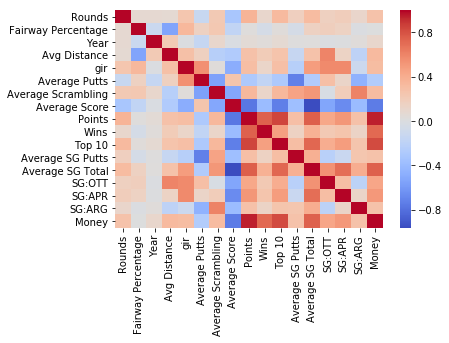

In [25]:
# Plot the correlation matrix between variables 
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm')


In [347]:
df.corr()['Wins']

Rounds                0.103162
Fairway Percentage   -0.047949
Year                  0.039006
Avg Distance          0.206294
gir                   0.120340
Average Putts        -0.168764
Average Scrambling    0.125193
Average Score        -0.390254
Points                0.750110
Wins                  1.000000
Top 10                0.473453
Average SG Putts      0.149155
Average SG Total      0.384932
SG:OTT                0.232414
SG:APR                0.259363
SG:ARG                0.134948
Money                 0.721665
Name: Wins, dtype: float64

From the correlation matrix, we can observe that Money is highly correlated to wins along with the FedExCup Points. We can also observe that the fairway percentage, year, and rounds are not correlated to Wins.

## 4. <a id='section_4'>Machine Learning Model (Classification)</a>
<a href='#TOC'>Back to table of Contents</a>

To predict winners, I used multiple machine learning models to explore which models could accuracy classify if a player is going to win in that year. 

To measure the models, I used Receiver Operating Characterisitc Area Under the Curve. (ROC AUC) The ROC AUC tells us how capable the model is at distinguishing players with a win. In addition, as the data is skewed with 83% of players having no wins in that year, ROC AUC is a better measure than the accuracy of the model. 

In [355]:
# Importing the Machine Learning modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

if __name__ == '__main__':
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', category=ImportWarning)

## Preparing the Data for Classification 


We know from the calculation above that the data for wins is skewed. Even without machine learning we know that approximately 83% of the players does not lead to a win. Therefore, we will be utilizing ROC AUC as the primary measure of these models

In [361]:
# Adding the Winner column to determine if the player won that year or not 
df['Winner'] = df['Wins'].apply(lambda x: 1 if x>0 else 0)

# New DataFrame 
ml_df = df.copy()

# Y value for machine learning is the Winner column
target = df['Winner']

# Removing the columns Player Name, Wins, and Winner from the dataframe
ml_df.drop(['Player Name','Wins','Winner'], axis=1, inplace=True)
print(ml_df.head())

   Rounds  Fairway Percentage  Year  Avg Distance    gir  Average Putts  \
0      60               75.19  2018         291.5  73.51          29.93   
1     109               73.58  2018         283.5  68.22          29.31   
2      93               72.24  2018         286.5  68.67          29.12   
3      78               71.94  2018         289.2  68.80          29.17   
4     103               71.44  2018         278.9  67.12          29.11   

   Average Scrambling  Average Score  Points  Top 10  Average SG Putts  \
0               60.67         69.617     868       5            -0.207   
1               60.13         70.758    1006       3            -0.058   
2               62.27         70.432    1020       3             0.192   
3               64.16         70.015     795       5            -0.271   
4               59.23         71.038     421       3             0.164   

   Average SG Total  SG:OTT  SG:APR  SG:ARG      Money  
0             1.153   0.427   0.960  -0.027  26

## Logistic Regression

In [362]:
per_no_win = target.value_counts()[0] / (target.value_counts()[0] + target.value_counts()[1])
per_no_win = per_no_win.round(4)*100
print(str(per_no_win)+str('%'))

83.09%


In [363]:
# Function for the logisitic regression 
def log_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 10)
    clf = LogisticRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy of Logistic regression classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
    print('Accuracy of Logistic regression classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))
    cf_mat = confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(data = cf_mat)
    print(confusion)
    
    print(classification_report(y_test, y_pred))
    
    # Returning the 5 important features 
    rfe = RFE(clf, 5)
    rfe = rfe.fit(X, y)
    print('Feature Importance')
    print(X.columns[rfe.ranking_ == 1].values)
    
    print('ROC AUC Score: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

In [364]:
log_reg(ml_df, target)

Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.91
     0   1
0  345   8
1   28  38
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       353
           1       0.83      0.58      0.68        66

   micro avg       0.91      0.91      0.91       419
   macro avg       0.88      0.78      0.81       419
weighted avg       0.91      0.91      0.91       419

Feature Importance
['Average Putts' 'Top 10' 'Average SG Total' 'SG:OTT' 'SG:ARG']
ROC AUC Score: 0.78


From the logisitic regression, we got an accuracy of 0.9 on the training set and an accuracy of 0.91 on the test set. This was surprisingly accurate for a first run. However, the ROC AUC Score of 0.78 could be improved. Therefore, I decided to add more features as a way of possibly improving the model.

### Feature Engineering

In [365]:
# Adding Domain Features 
ml_d = ml_df.copy()
# Top 10 / Money might give us a better understanding on how well they placed in the top 10
ml_d['Top10perMoney'] = ml_d['Top 10'] / ml_d['Money']

# Avg Distance / Fairway Percentage to give us a ratio that determines how accurate and far a player hits 
ml_d['DistanceperFairway'] = ml_d['Avg Distance'] / ml_d['Fairway Percentage']

# Money / Rounds to see on average how much money they would make playing a round of golf 
ml_d['MoneyperRound'] = ml_d['Money'] / ml_d['Rounds']

In [366]:
log_reg(ml_d, target)

Accuracy of Logistic regression classifier on training set: 0.91
Accuracy of Logistic regression classifier on test set: 0.91
     0   1
0  342  11
1   27  39
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       353
           1       0.78      0.59      0.67        66

   micro avg       0.91      0.91      0.91       419
   macro avg       0.85      0.78      0.81       419
weighted avg       0.90      0.91      0.90       419

Feature Importance
['Average Putts' 'Top 10' 'Average SG Total' 'SG:OTT' 'SG:ARG']
ROC AUC Score: 0.78


In [367]:
# Adding Polynomial Features to the ml_df 
mldf2 = ml_df.copy()
poly = PolynomialFeatures(2)
poly = poly.fit(mldf2)
poly_feature = poly.transform(mldf2)
print(poly_feature.shape)

# Creating a DataFrame with the polynomial features 
poly_feature = pd.DataFrame(poly_feature, columns = poly.get_feature_names(ml_df.columns))
print(poly_feature.head())

(1674, 153)
     1  Rounds  Fairway Percentage    Year  Avg Distance    gir  \
0  1.0    60.0               75.19  2018.0         291.5  73.51   
1  1.0   109.0               73.58  2018.0         283.5  68.22   
2  1.0    93.0               72.24  2018.0         286.5  68.67   
3  1.0    78.0               71.94  2018.0         289.2  68.80   
4  1.0   103.0               71.44  2018.0         278.9  67.12   

   Average Putts  Average Scrambling  Average Score  Points      ...       \
0          29.93               60.67         69.617   868.0      ...        
1          29.31               60.13         70.758  1006.0      ...        
2          29.12               62.27         70.432  1020.0      ...        
3          29.17               64.16         70.015   795.0      ...        
4          29.11               59.23         71.038   421.0      ...        

   SG:OTT^2  SG:OTT SG:APR  SG:OTT SG:ARG  SG:OTT Money  SG:APR^2  \
0  0.182329       0.409920      -0.011529   1144567.9

In [368]:
log_reg(poly_feature, target)

Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.91
     0   1
0  346   7
1   32  34
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       353
           1       0.83      0.52      0.64        66

   micro avg       0.91      0.91      0.91       419
   macro avg       0.87      0.75      0.79       419
weighted avg       0.90      0.91      0.90       419

Feature Importance
['Year gir' 'Year Average Scrambling' 'Year Average Score'
 'Avg Distance gir' 'Avg Distance Average Scrambling']
ROC AUC Score: 0.75


From feature engineering, there were no improvements in the ROC AUC Score. In fact as I added more features, the accuracy and the ROC AUC Score decreased. This could signal to us that another machine learning algorithm could better predict winners.

### SVM (Support Vector Machine)

In [388]:
def svc_class(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 10)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    
    svclassifier = SVC(kernel='rbf', C=10000)  
    svclassifier.fit(X_train_scaled, y_train) 
    y_pred = svclassifier.predict(X_test_scaled) 
    print('Accuracy of SVM on training set: {:.2f}'
         .format(svclassifier.score(X_train_scaled, y_train)))
    print('Accuracy of SVM classifier on test set: {:.2f}'
         .format(svclassifier.score(X_test_scaled, y_test)))

    
    print('ROC AUC Score: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

In [389]:
svc_class(ml_df, target)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Accuracy of SVM on training set: 0.97
Accuracy of SVM classifier on test set: 0.94
ROC AUC Score: 0.88


In [390]:
svc_class(ml_d, target)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Accuracy of SVM on training set: 0.97
Accuracy of SVM classifier on test set: 0.95
ROC AUC Score: 0.89


In [391]:
svc_class(poly_feature, target)

Accuracy of SVM on training set: 0.97
Accuracy of SVM classifier on test set: 0.94
ROC AUC Score: 0.88


With Support Vector Machines, the ROC AUC Scores were significantly better. The SVM scored a 0.89 on the data with domain features that I included compared to the score of 0.75 on the logisitic regression with polynomial features.

### Random Forest Model


In [88]:
def random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 10)
    clf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy of Random Forest classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
    print('Accuracy of Random Forest classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))
    
    cf_mat = confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(data = cf_mat)
    print(confusion)
    
    print(classification_report(y_test, y_pred))
    
    # Returning the 5 important features 
    rfe = RFE(clf, 5)
    rfe = rfe.fit(X, y)
    print('Feature Importance')
    print(X.columns[rfe.ranking_ == 1].values)
    
    print('ROC AUC Score: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

In [89]:
random_forest(ml_df, target)

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.93
     0   1
0  342  11
1   17  49
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       353
           1       0.82      0.74      0.78        66

   micro avg       0.93      0.93      0.93       419
   macro avg       0.88      0.86      0.87       419
weighted avg       0.93      0.93      0.93       419

Feature Importance
['Average Score' 'Points' 'Top 10' 'Average SG Total' 'Money']
ROC AUC Score: 0.86


In [90]:
random_forest(ml_d, target)

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.94
     0   1
0  342  11
1   16  50
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       353
           1       0.82      0.76      0.79        66

   micro avg       0.94      0.94      0.94       419
   macro avg       0.89      0.86      0.87       419
weighted avg       0.93      0.94      0.93       419

Feature Importance
['Average Score' 'Points' 'Average SG Total' 'Money' 'MoneyperRound']
ROC AUC Score: 0.86


In [91]:
random_forest(poly_feature, target)

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.95
     0   1
0  344   9
1   13  53
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       353
           1       0.85      0.80      0.83        66

   micro avg       0.95      0.95      0.95       419
   macro avg       0.91      0.89      0.90       419
weighted avg       0.95      0.95      0.95       419

Feature Importance
['Year Points' 'gir Top 10' 'Average Putts Points' 'Average Score Points'
 'Points^2']
ROC AUC Score: 0.89


The Random Forest Model was scored highly on ROC AUC Score, obtaining a value of 0.89. With this, we observed that the Random Forest Model and the Support Vector Machine Models could accurately classify players with and without a win. 

## 5. <a id='section_5'>Machine Learning Model (Regression)</a>
<a href='#TOC'>Back to table of Contents</a>

Can we predict a golfer's earnings by only looking at their statistics. (Not looking at their placings in the year)

### Preparing the Data for Regression 

In [401]:
# New DataFrame 
earning_df = df.copy()

# Y value for machine learning is the Money column
target = earning_df['Money']

# Removing the columns Player Name, Wins, Winner, Points, Top 10, and Money from the dataframe
earning_df.drop(['Player Name','Wins','Winner','Points','Top 10','Money'], axis=1, inplace=True)

print(earning_df.head())

   Rounds  Fairway Percentage  Year  Avg Distance    gir  Average Putts  \
0      60               75.19  2018         291.5  73.51          29.93   
1     109               73.58  2018         283.5  68.22          29.31   
2      93               72.24  2018         286.5  68.67          29.12   
3      78               71.94  2018         289.2  68.80          29.17   
4     103               71.44  2018         278.9  67.12          29.11   

   Average Scrambling  Average Score  Average SG Putts  Average SG Total  \
0               60.67         69.617            -0.207             1.153   
1               60.13         70.758            -0.058             0.337   
2               62.27         70.432             0.192             0.674   
3               64.16         70.015            -0.271             0.941   
4               59.23         71.038             0.164             0.062   

   SG:OTT  SG:APR  SG:ARG  
0   0.427   0.960  -0.027  
1  -0.012   0.213   0.194  
2   0.18

In [402]:
# Importing the Machine Learning modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


In [403]:
def linear_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
    clf = LinearRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print('R-Squared on training set: {:.3f}'
          .format(clf.score(X_train, y_train)))
    print('R-Squared on test set {:.3f}'
          .format(clf.score(X_test, y_test)))
    
    print('linear model coeff (w):\n{}'
         .format(clf.coef_))
    print('linear model intercept (b): {:.3f}'
         .format(clf.intercept_))


In [404]:
linear_reg(earning_df, target)

R-Squared on training set: 0.601
R-Squared on test set 0.640
linear model coeff (w):
[    5596.7147119      3888.01470514    29923.09760851    17645.92304676
   -19456.82389588  -512051.79339988   -53537.61424529  -708935.63288728
  1780737.5509437  -1367614.79700863  2210424.4579062   2307608.0829594
  2207460.7805201 ]
linear model intercept (b): 4887933.950


In [405]:
# Creating a Polynomial Feature to improve R-Squared
poly = PolynomialFeatures(2)
poly = poly.fit(earning_df)
poly_earning = poly.transform(earning_df)
print(poly_feature.shape)

# Creating a DataFrame with the polynomial features 
poly_earning = pd.DataFrame(poly_feature, columns = poly.get_feature_names(earning_df.columns))

(1674, 153)


In [406]:
linear_reg(poly_earning, target)

R-Squared on training set: 0.804
R-Squared on test set 0.765
linear model coeff (w):
[ 4.49683300e+01 -2.98309561e+06 -7.11838296e+06 -9.41224610e+05
 -1.02550945e+06  2.53294667e+07 -6.81474360e+07 -1.39240839e+06
  3.32551697e+06  4.40190318e+09 -4.48758900e+09  4.46696294e+09
  4.43107626e+09  4.43620382e+09 -3.66567488e+02  1.74031859e+03
  1.57778126e+03  4.99775105e+02 -3.98968316e+03  5.87343953e+03
 -2.73211630e+02 -3.83889618e+03 -1.28669031e+04  3.09035058e+04
 -2.25593178e+04 -1.19856766e+04 -2.52085890e+04 -9.86671492e+02
  3.38392869e+03 -1.89498536e+03 -2.61612133e+02  7.05442430e+03
 -9.59944851e+02  9.95160742e+03  1.56666482e+06 -1.59926875e+06
  1.62544243e+06  1.59514263e+06  1.57374263e+06  2.64388999e+03
  3.61562607e+02 -1.07752858e+04  2.72462035e+04 -3.40756017e+03
 -1.40903476e+05 -2.03742428e+06  1.96621827e+06 -2.06933914e+06
 -2.06929712e+06 -2.02606829e+06 -7.46587068e+02  5.53318774e+03
 -3.77173962e+04 -1.14094736e+03  2.26839527e+04  9.58570966e+05
 -9.6

In [417]:
# Adding a regularization penalty (Ridge)
def linear_reg_ridge(X, y, al):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 10)
    clf = Ridge(alpha = al).fit(X_train, y_train)

    print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
         .format(clf.score(X_train, y_train)))
    print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
         .format(clf.score(X_test, y_test)))
    
    print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
         .format(clf.coef_))
    print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
         .format(clf.intercept_))

In [419]:
linear_reg_ridge(poly_earning, target, al = 1)

(poly deg 2 + ridge) R-squared score (training): 0.794
(poly deg 2 + ridge) R-squared score (test): 0.770
(poly deg 2 + ridge) linear model coeff (w):
[ 0.00000000e+00 -6.58062051e+05 -1.30060387e+05 -2.01689662e+04
  1.77704289e+05  6.17466430e+04  2.07126448e+04 -1.25359035e+05
  2.12844275e+04 -1.20474369e+04 -1.59526569e+04  2.89363408e+03
 -4.81262037e+02 -6.26761021e+03 -3.95024379e+02  1.60103357e+03
  5.60479374e+02  4.51686863e+02 -3.18608343e+03  5.91892266e+02
 -2.33963353e+02 -5.94949185e+03 -9.99430168e+04  1.12069363e+05
 -1.07452339e+05 -9.63792955e+04 -1.11435185e+05 -8.66524993e+02
  5.37577496e+02 -1.69790474e+03 -6.78296059e+02  1.42461831e+04
 -1.47646201e+03 -1.07106396e+04 -8.85102234e+04  5.43233282e+04
 -5.62407766e+04 -8.09058159e+04 -9.90557606e+04  1.49179373e+03
 -2.19769879e+00  8.32474945e+02 -1.43121416e+04 -3.64043882e+03
 -7.69075820e+04 -2.29479986e+04 -3.66078782e+04 -1.71206891e+04
 -2.47734955e+04 -4.19449448e+02 -7.17905757e+02  4.43329980e+03
 -2.

In [420]:
linear_reg_ridge(poly_earning, target, al = 100)

(poly deg 2 + ridge) R-squared score (training): 0.786
(poly deg 2 + ridge) R-squared score (test): 0.768
(poly deg 2 + ridge) linear model coeff (w):
[ 0.00000000e+00 -8.79086993e+03 -1.59723225e+03 -3.81564237e+02
  2.39517728e+03  8.92261467e+02  3.29706780e+02 -1.41689736e+03
  3.65989780e+02 -1.52186433e+02 -2.67538402e+02  4.21264877e+01
 -5.31493636e+01 -1.05556577e+02 -4.30436681e+02  1.58654165e+03
  3.65630791e+02  4.48522505e+02 -2.39850118e+03 -7.46370350e+03
 -7.46231012e+02 -6.46835382e+03 -1.41396288e+04  2.13790816e+04
 -1.82904938e+04 -5.46609724e+03 -1.85935404e+04 -1.41297002e+02
  3.26467405e+02 -8.94035776e+02 -3.05465907e+03  2.33558039e+04
 -2.61194554e+03 -1.16580146e+04 -1.25191699e+04 -7.91580024e+03
  1.44613478e+03 -3.11690061e+04 -8.27940799e+03  1.05749812e+02
  6.16759640e+02  7.93717690e+02 -5.34858066e+02  3.63270998e+02
 -9.64296815e+03  4.56921085e+02 -9.38959312e+02 -3.21496079e+03
  2.86838465e+03 -4.75179228e+03 -6.31937984e+02  4.13568540e+03
 -3.

Out of the 3 models that I implemented, I had the most success with the ridge regression with a polynomial degree of 2 and an alpha of 1. This ridge regression had a R-squared value of 0.770 which was only slightly better than the polynomial regression. 

### Cross Validation 

In [235]:
from sklearn.model_selection import cross_val_score

def cross_val(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
    clf = Ridge().fit(X_train, y_train)
    scores = cross_val_score(clf, X, y, cv=5)
    
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print(scores)

In [236]:
cross_val(poly_earning, target)

Accuracy: 0.74 (+/- 0.07)
[0.7810936  0.7402763  0.76553188 0.70404897 0.69738915]


### Application of the Linear Regression Model 

In [237]:
# Using the Linear Regression to predict Tiger Wood's Earnings based on the Model
def find_earning(X,y,name,year):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 10)
    clf = Ridge().fit(X_train, y_train)
    y_pred = clf.predict(X)
    y_pred = pd.Series(y_pred)

    pred_data = pd.concat([X, y_pred], axis=1)
    pred_name = pd.concat([pred_data, df['Player Name']], axis=1)

    return pred_name.loc[(pred_name['Player Name']==name) & (pred_name['Year']==year), 0]


## 6. <a id='section_6'>Conclusion</a>
<a href='#TOC'>Back to table of Contents</a>

### What I Learned

From this notebook, I learned about numerous aspects of the game that differentiate the winner and the average PGA Tour player. For example, we can see that the fairway percentage and greens in regulations does not seems to contribute as much to a player's win. However, all the strokes gained statistics contribute pretty highly to wins for these players. It was interesting to see which aspects of the game that the professionals should put their time into. This also gave me the idea of track my personal golf statistics, so that I could compare it to the pros and find areas of my game that need the most improvement. 

### Machine Learning Model

From this PGA Tour EDA and Machine Learning Models, I was able to examine the data of PGA Tour players, classify if a player will win that year or not, and predict their earnings. While, I believe that I can improve my prediction of their earnings, I am satisfied with my classification and regression model. With the random forest classification model, I was able to achieve an ROC AUC of 0.89 and an accuracy of 0.95 on the test set. This was a significant improvement from the ROC AUC of 0.78 and accuracy of 0.91. Because the data is skewed with approximately 80% of players not earning a win, the primary measure of the model was the ROC AUC. I was able to improve my model from ROC AUC score of 0.78 to a score of 0.89 by simply trying 3 different models, adding domain features, and polynomial features.

### Moving Forward

Having done a simple regression model on predicting the earnings of golfers, I would like to come back to this project again with a deeper understanding of other regression models to attempt to better predict the earnings of golfers. As shown below, the model predicted that Tiger Woods would make 1.3 million dollars in the year 2013. But in fact, Tiger Woods made 8 million dollars. Tiger Woods is one of the best players in the world is definately an outlier. However, I would like to come up with a model that can better predict the earnings of even the best players in the world. 

If you made it to the end of this notebook, I hope you learned something about the PGA Tour statistics!

In [424]:
print('Tiger Woods\' Predicted Earning: ' + 
      str(find_earning(X = poly_earning, y = target, name = 'Tiger Woods', year = 2013).values[0]))

# Tiger Wood's actual earnings in 2018 
tw13 = df.loc[(df['Player Name']=='Tiger Woods') & (df['Year']==2013), 'Money']
print('Tiger Woods\' Actual Earning: ' + str(tw13.values[0]))


Tiger Woods' Predicted Earning: 1367235.1486470997
Tiger Woods' Actual Earning: 8553439.0
